# Ch09_3.케라스

## 1.기본 package 설정

In [1]:
## 1.기본
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

Using TensorFlow backend.


## 2.데이터 가져오기

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

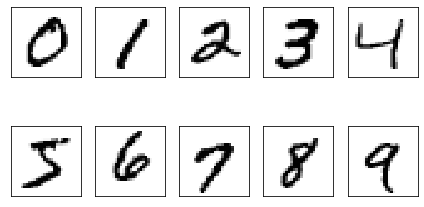

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0]
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

## 3.데이터 전처리

### 3.1 data(X) 레이블 인코딩
- 0과 1사이의 값으로 변환
- 0 ~ 255값을 0~1사이의 값으로 표준화 시키기 위해 data/255로 나누어 줌

In [6]:
X_train = X_train.reshape(60000, 28 * 28).astype('float32') / 255.0
X_test = X_test.reshape(10000, 28 * 28).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(60000, 784) float32
(10000, 784) float32


In [7]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 3.2 Class(target) 레이블 인코딩
- class를 각각 나누어서 10개로 분류

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from keras.utils import to_categorical

y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [10]:
print(y_train_c.shape, y_test_c.shape)

(60000, 10) (10000, 10)


In [11]:
y_train_c

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
y_test_c

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 4.훈련/검증용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할

## 5.모델구축

### 5.1 신경망 구성

In [13]:
np.random.seed(1)

model = models.Sequential()

# tensorflow: Dense,          input_dim=X_train.shape[1], 
# keras:      layer.Dense     input_shape=(X_train.shape[1],) 

model.add(layers.Dense(50,
                       input_shape=(X_train.shape[1],), # input_shape = (X, )으로 입력
                       activation="relu"))

model.add(layers.Dense(50,
                       activation="relu"))

model.add(layers.Dense(y_test_c.shape[1],
                       activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


### 5.2 신경망 훈련
- 이진 분류 : binary_crossentropy
- 다중 분류 : categorical_crossentropy
- 다양한 최적화 옵션은 keras 창시자에게 배우는 딥러닝을 참조

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, 
                    y_train_c,
                    batch_size=64, 
                    epochs=30,
                    validation_data=(X_test, y_test_c),             
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.3378 - accuracy: 0.9028 - val_loss: 0.1968 - val_accuracy: 0.9403
Epoch 2/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.1628 - accuracy: 0.9525 - val_loss: 0.1404 - val_accuracy: 0.9584
Epoch 3/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.1207 - accuracy: 0.9646 - val_loss: 0.1153 - val_accuracy: 0.9639
Epoch 4/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.0988 - accuracy: 0.9704 - val_loss: 0.1080 - val_accuracy: 0.9671
Epoch 5/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.0835 - accuracy: 0.9751 - val_loss: 0.1025 - val_accuracy: 0.9693
Epoch 6/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0743 - accuracy: 0.9781 - val_loss: 0.0941 - val_accuracy: 0.9716
Epoch 7/30
60000/60000 [==============================] - 3s 43us/st

## 6. 모델검정

### 6.1 훈련데이터 정확도

In [29]:
train_loss, train_acc = model.evaluate(X_train, y_train_c)
print('훈련 비용: %.4f%%' % (train_loss))
print('훈련 정확도: %.4f%%' % (train_acc))

60000/60000 [==============================] - 1s 24us/step
훈련 비용: 0.0098%
훈련 정확도: 0.9969%


### 6.2 검증 데이터 정확도

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test_c)
print('테스트 비용: %.2f%%' % (test_loss * 100))
print('테스트 정확도: %.2f%%' % (test_acc * 100))

10000/10000 [==============================] - 0s 26us/step
테스트 비용: 17.16%
테스트 정확도: 97.34%


### 6.2 검증 데이터 정확도

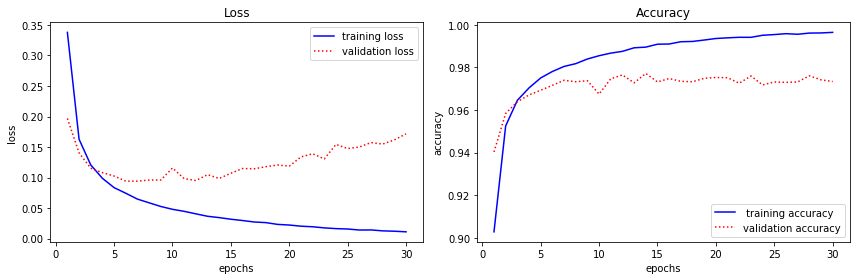

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss)+1)


plt.figure(figsize=(12, 4))

# 비용함수
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, 'b-', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.legend()

# 정확도
plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel('epochs')
plt.plot(epochs, accuracy, 'b-', label=" training accuracy")
plt.plot(epochs, val_accuracy, 'r:', label="validation accuracy")
plt.legend()

plt.tight_layout()
plt.show()